<h1 style="font-size: 70px;text-align: center; font-family:Copperplate; color: darkblue">Fake News Detection</h1>


<!-- # EDA -->
<div style = "height: 50px;
  width: 800px;
  background-color: darkblue;">
    <h1 style="padding: 10px;
              color:white;">
        <b>Introduction</b>
    </h1>

</div>

<p style="font-size:30px; font-family:Papyrus"><b>Why should you care about whether or not your news is real or fake?</b></p>

<p style="font-family:Times New Roman ;font-size:20px">The spread of fake news has become easier in the digital age, as social media platforms and other online channels allow anyone to create and share content with the world. The problem with fake news is that it can be very convincing, and people may believe it to be true without questioning its authenticity. This can lead to a range of negative consequences, That is why a sophisticated method is required to identify fake news</p>

<h1 style="font-family:Papyrus">Notebook Overview:</h1>
<ol>
    <li><p style="font-family:Times New Roman ;font-size:20px">An extensive EDA of data present in different news articles</p></li>
    <li><p style="font-family:Times New Roman ;font-size:20px">The Goal of This notebook is to use Machine Learning to Detect Fake News</p></li>
</ol>

<div style = "height: 50px;
  width: 800px;
  background-color: darkblue;">
    <h1 style="padding: 10px;
              color:white;">
        <b>Table of Contents:</b>
    </h1>

</div>

<div>
    <ol>
        <li>
            <a href="#eda"> EDA</a><br/>
            <ul>
                <li><a href="#rd">1.1 Reading data</a></li>
                <li><a href="#nt">1.2 Data Visualization of all News Titles</li>
                <li><a href="#ft">1.3 Data Visualization of texts in fake news</li>
                <li><a href="#rt">1.4 Data Visualization of texts in real news</li>
            </ul>
        </li>
        <li>
            <a href="#bm">Bag of Words Model</a><br/>
        </li><br/>
        <li>
            <a href="#nb">Naive Bayes Model</a><br/>
            <ul>
                <li><a href="#p1">Predictions</a></li>
                <li><a href="#e1">Evaluation</a></li>
                <li><a href="#cm1">Confusion Matrix</a></li><br/>
            </ul>
        </li>
        <li>
            <a href="#rm"> Random Forest Model</a><br/>
             <ul>
                <li><a href="#p2">Predictions</a></li>
                <li><a href="#e2">Evaluation</a></li>
                <li><a href="#cm2">Confusion Matrix</a></li>
            </ul>
        </li>
        <br/>
    </ol>
</div>

<!-- # EDA -->
<div id = "eda" style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>1.EDA</b>
    </h1>

</div>

In [44]:
!pip install numpy pandas matplotlib seaborn scikit-learn wordcloud nltk joblib

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

<div id = "rd"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.1 Reading Data
    </h3>

</div>

In [2]:
df = pd.read_csv('./WELFake_Dataset.csv')
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [3]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [5]:
y = df.label
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


label
real    0.514404
fake    0.485596
Name: proportion, dtype: float64

In [6]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

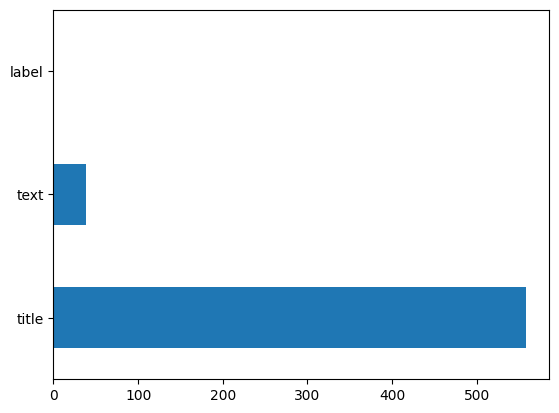

In [7]:
df.isnull().sum().plot(kind="barh")
plt.show()

<div style = "height: 210px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               ">
        <b>Observations:</b> 
        
 <p>
     <ol>
         <li>There are a total of 4 columns and 72134 rows in the data</li>
         <li>Label is the target variable</li>
         <li>Percentage of Real and fake News articles:<ul><li>real : 51%</li><li>fake :49%</li></ul></li>
         <li>Missing values are present in the dataset</li>
    </ol>
 </p>
    </h3>

</div>

In [8]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [9]:
df = df.fillna('')

In [10]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [11]:
df.nunique()

title    62348
text     62719
label        2
dtype: int64

In [12]:
df["title_text"] = df["title"] + df["text"]
df["body_len"] = df["title_text"].apply(lambda x: len(x) - x.count(" "))
df.head()
df["text"]

0        No comment is expected from Barack Obama Membe...
1           Did they post their votes for Hillary already?
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 72134, dtype: object

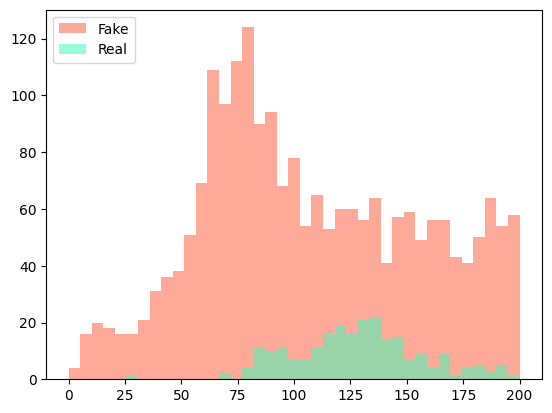

In [13]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(df[df["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

<div style = "height: 150px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="padding: 10px;
              color:black;
               ">
        <b>Insights :</b> 
        <br></br>
       
 <i>Fake news seem to be quite a bit longer than real news.</i>
    </h3>

</div>

Text(0.5, 1.0, 'Distribution of Fake/Real News')

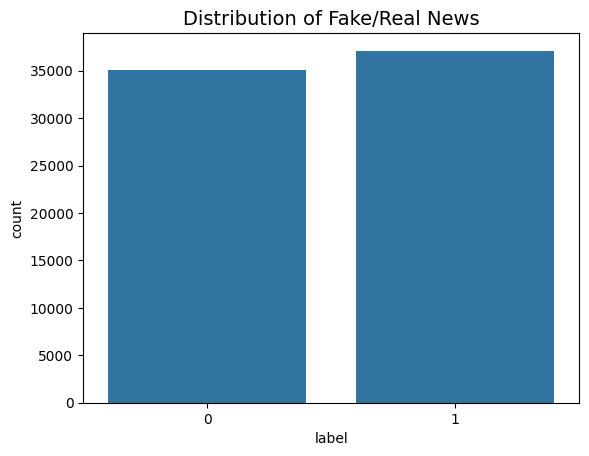

In [14]:
class_names = ['fake', 'real'] 
label_count = df.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

In [15]:

y.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)
X_test.head(1)

9406    WASHINGTON/BOSTON (Reuters) - Bharat R. Ramamu...
Name: text, dtype: object

<div id = "nt"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.2 Data Visualization of all News Titles
    </h3>

</div>

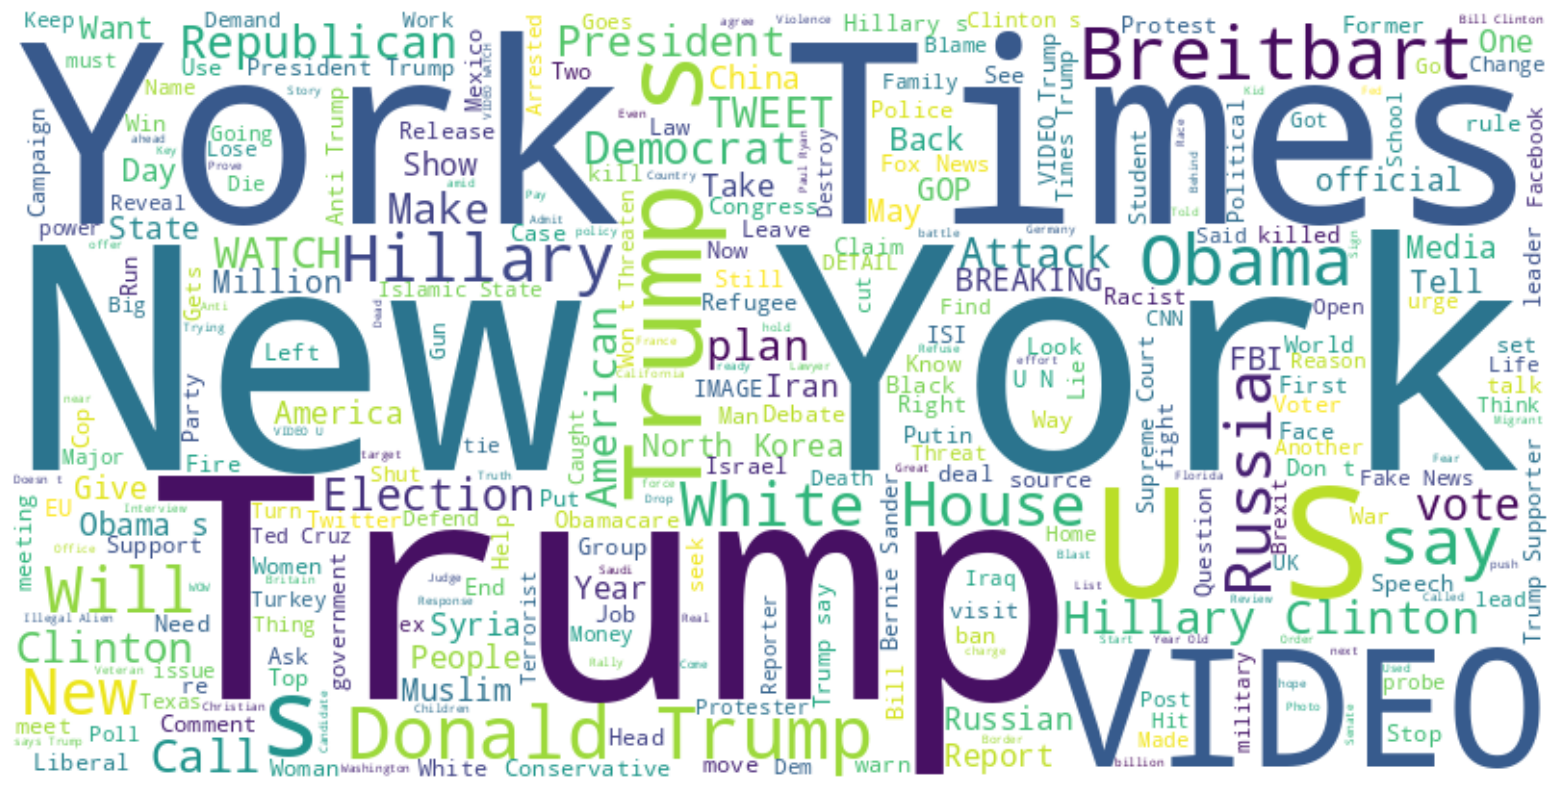

In [17]:

titles = ' '.join(title for title in df['title'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div style = "height: 110px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               ">
        <b>Quick Insights:</b> 
        
 <p>
     <ul>
         <li>many of available news articles are about elections and presidents of USA </li>
    </ul>
 </p>
    </h3>

</div>

<div id = "ft"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.3 Data Visualization of texts in fake news
    </h3>

</div>

In [2]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'X_train' is not defined

<div id = "rt"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.4 Data Visualization of texts in Real news
    </h3>

</div>

<function matplotlib.pyplot.show(close=None, block=None)>

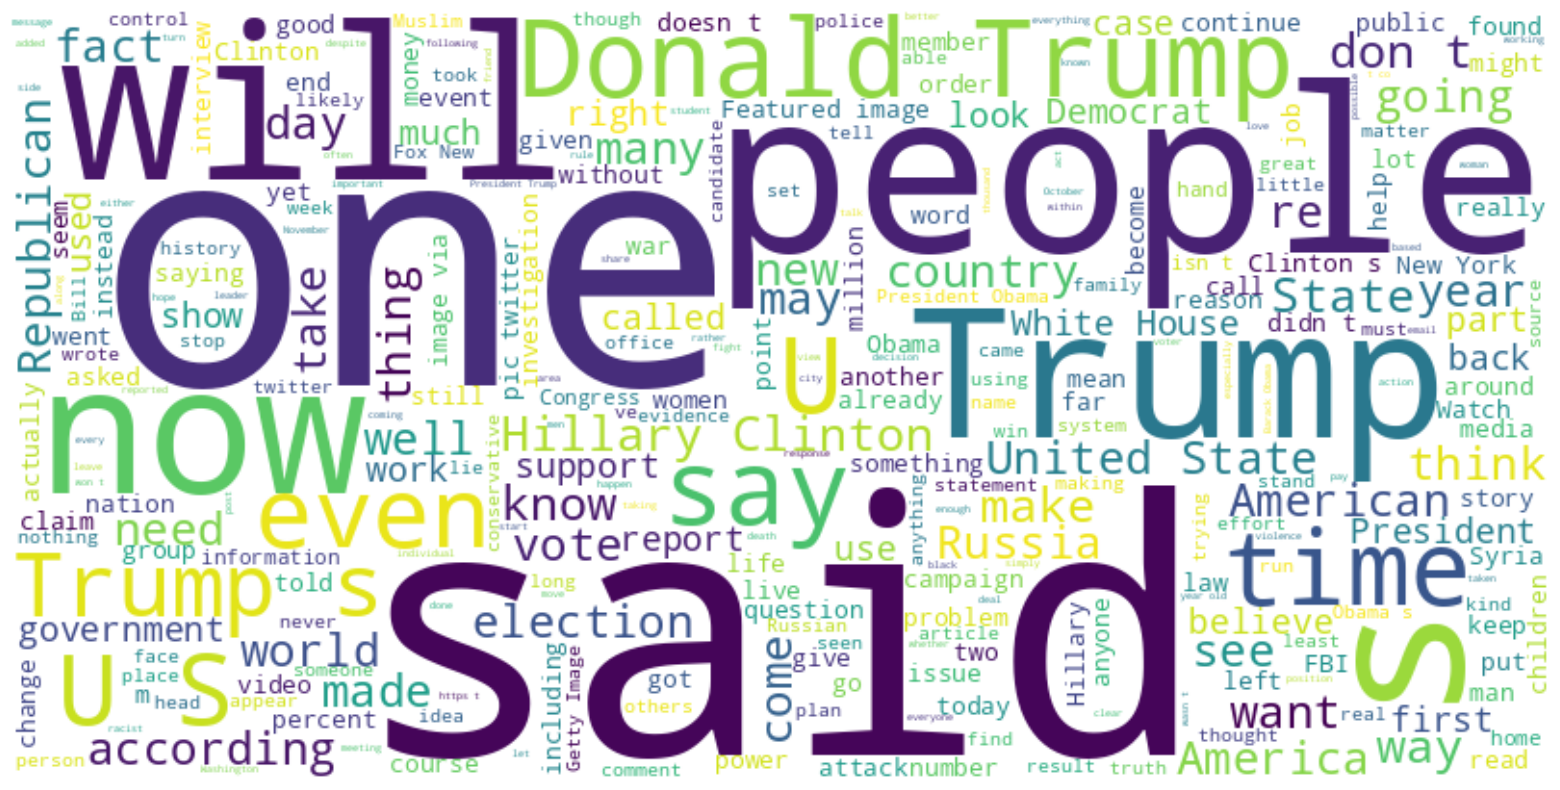

In [19]:
real_texts = ' '.join(text for text in real_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(real_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<!-- # EDA -->
<div id = "bm"style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>2.Bag of Words Model</b>
    </h1>

</div>

In [18]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
X_test


9406     WASHINGTON/BOSTON (Reuters) - Bharat R. Ramamu...
45759    CAIRO  —   Libyan officials were cautious on T...
69814    21st Century Wire says This is one step closer...
42505    in: Government , Government Corruption , Speci...
37149    TEL AVIV  —   The U. S. Russia and Israel are ...
                               ...                        
36321    LONDON (Reuters) - U.S. Republican presidentia...
23383    WASHINGTON (Reuters) - The No. 2 U.S. House of...
4820     WASHINGTON (Reuters) - The White House is very...
30564    Yep that s correct. Your hard earned tax dolla...
34820    REAL journalism hit Washington today! One of o...
Name: text, Length: 23805, dtype: object

<!-- # EDA -->
<div id = "rm" style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>4.Training Random Forest Model</b>
    </h1>

</div>

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(count_train, y_train)


RandomForestClassifier(n_estimators=300)

<div id = "p2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.1 Predictions on Random Forest Classifier
    </h3>

</div>

In [20]:
pred2 = model.predict(count_test)

<div id = "e2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.2 Evaluation of RF Classifier Predictions
    </h3>

</div>

In [21]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11640
           1       0.93      0.94      0.94     12165

    accuracy                           0.93     23805
   macro avg       0.93      0.93      0.93     23805
weighted avg       0.93      0.93      0.93     23805



<div style = "height: 65px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               text-align: center;
               ">
        <i><b>Accuracy achieved using Random Forest Model : 94%</b></i>
    </h3>

</div>

<div id = "cm2" style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.3 Confusion Matrix
    </h3>

</div>

Text(70.72222222222221, 0.5, 'Real Labels')

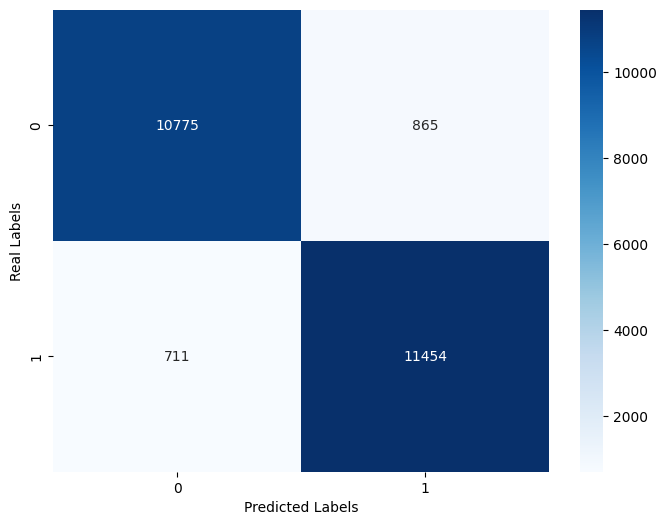

In [22]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred2), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

<div style = "height: 100px;
  width: 800px;
  background-color: #e2e1e9;">
    <p style="padding: 10px;
              color:black;
              text-align:center;">
        <b>Thank you for reading. <br></br> Please do upvote if you liked the notebook If you have any suggestions please let me know<b>
    </p>

</div>

# save model in a  filee

In [45]:
from joblib import dump, load


# Save model
# dump(model, 'model.pkl')

# # Load model
# loaded_model = load('model.pkl')
dump(count_vectorizer, 'count_vectorizer.pkl')

# Load model
loaded_model = load('count_vectorizer.pkl')



In [43]:
fake_news

4155     WASHINGTON (Reuters) - The chairman of the U.S...
64782    ABU DHABI, United Arab Emirates  —   Lewis Ham...
44767    An international tribunal in The Hague release...
1730     BAGHDAD (Reuters) - Gorran, a main opposition ...
32547    WINSTON-SALEM, N.C. (Reuters) - North Carolina...
                               ...                        
37364    JAKARTA, Indonesia  —   The Christian governor...
46843    NEW YORK (Reuters) - Americans’ demand for an ...
55717    WASHINGTON (Reuters) - Democrat candidates Hil...
35701    COPENHAGEN (Reuters) - Danish Police have char...
56857    WASHINGTON (Reuters) - In Friday s speech layi...
Name: text, Length: 23388, dtype: object

In [26]:
res.cumsum(0)

NameError: name 'res' is not defined

In [19]:
# import joblib
# from sklearn.feature_extraction.text import CountVectorizer
# import pandas as pd

# # Assuming X_train is a pandas Series
# X_train_transformed = vectorizer.fit_transform(X_train)  # Fit vectorizer

# # Save the trained vectorizer
# joblib.dump(vectorizer, "count_vectorizer.pkl")  

# # Train your model (assuming it's already done)
# model.fit(X_train_transformed, y_train)

# # Save the trained model
# joblib.dump(model, "model.pkl")


In [36]:
# 0 = fake ,,,,,,,  1 = real
q = pd.array(X_train[y_train == 1])
q[10]

'When dealing with a candidate who has the maturity level of an elementary school student, you re going to have to expect name-calling, and now Donald Trump is now using this tactic against Hillary Clinton and Elizabeth Warren. Two very powerful women, but two very powerful women that aren t about to put up with his horseshit tactics. They may have worked against his ridiculous Republican competition, but no, not now. He ll be called out and taken to task.Which is exactly has what just happened when Trump decided to hit back at Warren s viral Facebook post calling him out.Trump took to twitter, several days after Warren called him out, and decided to try to pull his same old song and dance. He tweeted:I hope corrupt Hillary Clinton chooses goofy Elizabeth Warren as her running mate. I will defeat them both.  Donald J. Trump (@realDonaldTrump) May 6, 2016And then continues this name-calling for a few more tweets:Let s properly check goofy Elizabeth Warren s records to see if she is Nati